Chezka Sino (9028-67538)

# MCIS6273 Data Mining (Prof. Maull) / Fall 2019 / HW2

**This assignment is worth up to 40 POINTS to your grade total if you complete it on time.**

| Points <br/>Possible | Due Date | Time Commitment <br/>(estimated) |
|:---------------:|:--------:|:---------------:|
| 40 | Wednesday, December 11 @ Midnight | _up to_ 12 hours |


* **GRADING:** Grading will be aligned with the completeness of the objectives.

* **INDEPENDENT WORK:** Copying, cheating, plagiarism  and academic dishonesty _are not tolerated_ by University or course policy.  Please see the syllabus for the full departmental and University statement on the academic code of honor.

## OBJECTIVES
* improve on your homework 1 assignment, if necessary

* continue exploratory data analysis and visualization

* perform a clustering analysis using k-means

## WHAT TO TURN IN
You are being encouraged to turn the assignment in using the provided
Jupyter Notebook.  To do so, make a directory in your Lab environment called
`homework/hw2`.   Put all of your files in that directory.  Then zip that directory,
rename it with your name as the first part of the filename (e.g. `maull_hw2_files.zip`), then
download it to your local machine, then upload the `.zip` to Blackboard.

If you do not know how to do this, please ask, or visit one of the many tutorials out there
on the basics of using zip in Linux.

## ASSIGNMENT TASKS
### (25%) continue exploratory data analysis and visualization 

In the last HW we explore some of the bas features of Pandas with graphic and data selection.
This time we're going to go a but deeper into Pandas ans learn about MultIndices and grouping
data in interesting and useful ways.

One of the things that we learned from the data last time is that the majority of it are
interesting over several dimensions.  There are the years of competition, the sex of the competitors,
the age the competitors, country of origin, among other things.  With denser data like these, we want
to understand some of the underlying groupings for easier access to the data.  For example,
one might want to understand how groupings by year and age bear out on the data to explore questions
like "Has the number of competitors over 40 increased over the years?"  This might be an interesting
question to ask to explore if powerlifters continue to compete as they age since the sport is very
difficult on one's body and requires intense continuous training to stay competitive.

Some questions like these are also very useful to explore visually, so we'll dive into a few more
graphical techniques to get at these answers and more.  We're going to end up with a DataFrame
that will group our data by year, age class and sex, so we can see some of the interesting
annual trends along each of these dimensions within the last two decades.

&#167;  Let's first get a feel for the data and filter it down.  One of the main
difficulties in dealing with large user-contributed data sets like these
are _data consistency_ and _data quality_.  _Data consistency_ refers to
how data is represented over time.  We can see how this becomes an issue
when we look at the `Division` column of the dataset.  We can see with a
relatively untrained eye to the data, that something is very wrong with
the consistency &mdash; there are over 1300 Division designations!  When
you look at it more closely, there are groupings that overlap.  For
example, you will see `Masters 45-49` and `Masters 40-49` when you
perform a `.value_counts()` on the `Divisions` column of the data (see
supplemental notebook).  What is the difference between these two since
they obviously overlap?



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/openpowerlifting-2019-10-24.csv", low_memory=False)

In [3]:
df.shape

(489510, 38)

In [4]:
df['Division'].value_counts()['Masters 45-49'] - df['Division'].value_counts()['Masters 40-49']

2707

Filter the data down to a smaller subset of the data using
[`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).
Specifically, drop all rows of data missing `Age`
and `Division` data (e.g. they have `NaN` values).  You will be able to do this by passing a
`subset=` parameter into `dropna()`.



In [5]:
df.dropna(subset=['Age','Division'], inplace=True)

You should now have fewer than 200K data points, leading us to the second
problem of _data quality_.  When we look at the original data file, we have
over 400K data points, yet after filtering for missing values, we end up
with over 50% reduction in the data!  This is actually a reasonable preservation
of the original data set given that we `NaN` values from two different columns.
In general, it isn't a bad idea when working with your data to develop an
understanding of the holes in it.  What if we reduced our data 90% just on
`Age` indicating it was not recorded consistently over time?  This would indeed
limit what we could ask of the data in analyses requiring age data.  Many of
the tools in Pandas will ignore `NaN` data, but some required you to send
specific instructions to the tool on what to do.  Better to get ahead of things
now.

In your notebook **you must include the following** to be considered a correct answer:

* correct use of `dropna()`,
* output of the original dimensions of the data using `DataFrame.shape` or
  something similar that shows the original and new dimensions of the data.




In [6]:
df.shape

(187846, 38)

&#167;  One of the major issues with any data set when importing into Pandas is the
that Pandas tries to infer the data types so that when you compare data
you are comparing data that _can_ be compared (i.e. you cannot  compare
strings with integers).  One area that you'll need to be mindful
of is with dates.  For example, if you perform a `df.Date.head()` the
data is of type `object`.  We want it to be `Datetime` so we can benefit
from the many useful features in Pandas to manipulate dates.

Doing this is straightforward with the [`pandas.datetime()`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime) method.
Your notebook must show:

* use of `pandas.datetime` to convert the `Date` column
  of your data to `datetime` (hint: use `loc` to set the data),
* that the column has changed by using `DataFrame.dtype` or alternatively
  use `DataFrame.head()` which will show the data type in its output.

**NOTE**: you may need to use the `errors` parameter of `to_datetime` to
handle any issues you may encounter.




In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
df.Date.head()

0   2018-10-27
1   2018-10-27
2   2018-10-27
3   2018-10-27
4   2018-10-27
Name: Date, dtype: datetime64[ns]

&#167;  Pandas provides superior capabilities to slice and group data.  We would like
to build a dataset that is composed of all remaining data from
1999 to 2018 that restricts age to those 21 and older.

Like the last homework, doing this is simple with [`Dataframe.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html#pandas.DataFrame.query).  You will notice that a
query over the `Date` column can be done naturally by just saying
`Date > a_year` since it is a `datetime` object.  Pandas does the inferential
magic for you!



Next add to your query by grouping the data by `Date`, `AgeClass`
and `Sex`.   You will need to use the [`DataFrame.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)
method to accomplish this.  **A hint for grouping by year**: if you do not restrict
the data in the `Date` column Pandas will naturally group by the
full date meaning that each _day_ will be grouped leading to the
wrong result.  You can convert a date to a year for the purposes of
grouping by year using `dt.to_period('Y')`.  Please see the documentation for
[`Series.dt.to_period()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.to_period.html).

You will pass to the first parameter of `DataFrame.groupby()` the list of
the grouping in order of grouping, outer group first.  Thus, `groupby(['Sex', 'AgeClass`])
will return the MultiIndex DataFrame with `Sex` as the outermost group
and `AgeClass` the inner group.  See the supplemental notebook for some
more clues.

Your notebook must show:

* use of `query()` to restrict your data to competitors 21 and older
  in competitions from 1999 to 2018,
* use of `groupby` showing the **`mean()`** values for each column with
  groups being (in order) `Date (year)`, `AgeClass` and `Sex`.




In [15]:
df2 = df.query('Date>1999 & Date<2018 & Age>=21')

In [16]:
df2['Date'] = df2.Date.dt.to_period('Y')

C:\Users\chezk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df2.Date.head()

109    2015
110    2015
111    2015
112    2015
113    2015
Name: Date, dtype: period[A-DEC]

In [19]:
df_grouped = df2.groupby(['Date', 'Sex', 'AgeClass']).mean().loc[:,:]

In [24]:
df_grouped

Age  BodyweightKg    Squat1Kg    Squat2Kg  \
Date Sex AgeClass                                                    
1999 F   20-23     21.851064     63.530638   48.214286   41.309524   
         24-34     28.121951     61.345620   59.345161   46.924333   
         35-39     36.680851     64.125682  101.153846   18.653846   
         40-44     42.232759     67.148276   75.625000   -6.875000   
         45-49     47.818182     57.333333 -140.000000  140.000000   
         50-54     51.928571     64.571429         NaN         NaN   
         55-59     58.000000     86.250000   99.790000  113.400000   
         60-64     62.250000     63.750000         NaN         NaN   
     M   20-23     21.942857     84.422634  109.744898   48.158163   
         24-34     29.084101     95.211205  138.193687   70.976057   
         35-39     37.112108     95.960190  146.864219   90.456825   
         40-44     41.750000     95.875376  111.597333   43.332333   
         45-49     46.939655     96.828761   65.000000   47.625000   
         50-54     51.933333     99.884038  107.891600  109.439583   
         55-59     57.171233     96.055556   69.719333   96.929333   
         60-64     61.605769     89.948846   87.142857  -26.428571   
         65-69     66.433333     96.226429   66.250000 -112.500000   
         70-74     72.166667     96.981250  165.000000  187.500000   
         75-79     77.500000     86.666667         NaN         NaN   
2000 F   20-23     22.012500     64.379500   53.100000   63.076923   
         24-34     28.192308     57.936549   65.166667   69.008621   
         35-39     37.183333     60.217083  124.166667  133.750000   
         40-44     41.571429     63.489744   29.583333   78.333333   
         45-49     47.388889     59.405556   89.062500    1.250000   
         50-54     51.157895     56.043158   99.166667   77.083333   
         55-59     56.500000     57.180000         NaN         NaN   
         60-64     61.250000     86.250000         NaN         NaN   
         70-74     70.500000     59.400000         NaN         NaN   
     M   20-23     22.008671     81.798663  117.027559   55.858268   
         24-34     28.669591     85.263653  117.428910   57.121951   
...                      ...           ...         ...         ...   
2016 M   55-59     56.911111     90.150644  117.649573  130.201949   
         60-64     61.888889     90.274880   56.159853   65.682656   
         65-69     67.016667     81.239809   87.789855   55.955882   
         70-74     72.022523     81.575495   63.399091   28.167813   
         75-79     77.067901     81.844321   57.647059   45.000000   
         80-999    83.384615     71.692308   77.500000   12.500000   
2017 F   20-23     22.022774     63.396284   80.935853   71.056824   
         24-34     28.579062     67.314735   79.350185   74.399530   
         35-39     36.919588     71.257562   80.920830   70.617282   
         40-44     41.910853     71.104424   68.710939   75.792877   
         45-49     47.182000     66.697720   64.992481   47.127323   
         50-54     52.076233     67.112377   74.643362   67.820877   
         55-59     56.609756     66.786748   57.353226   47.750000   
         60-64     61.733333     60.975333   54.693000   55.146667   
         65-69     67.105263     61.925000   36.842105   13.947368   
         70-74     71.625000     59.406250   41.250000   47.500000   
         75-79     77.750000     52.925000    0.000000    3.750000   
         80-999    81.187500     60.163750         NaN         NaN   
     M   20-23     22.085075     89.260956  142.009659  123.809021   
         24-34     28.447141     92.829934  150.216587  130.678346   
         35-39     36.884561     96.306172  147.933969  121.813167   
         40-44     42.017270     96.906692  139.056561  108.073276   
         45-49     47.073549     92.245751  130.927994  114.368882   
         50-54     51.996569     92.070792  119.517308  115.507399   
         55-59     56.880907     89

&#167;  Now that we have the data segmented the way we'd like, let's visualize it
in some interesting way.

With powerlifting there are a number of ways to express the _strength_ of a
competitor. There is _raw_ strength, meaning how much total weight was lifted
on a given lift, and there is _relative_ strength.  It is not fair to compare
the raw lift of a 100lb 16 year old teenage to that of a 35 year old 300lb adult.

The 35 year old might lift ten times the weight yet the 16 year old may be _relatively_
stronger, but how would we compare their
_relative_ strenghts?  Many competitors will be able to lift between 2 and 7 times
their body weight depending on the lift, so we might expect a 100lb powerlifter
to perhaps perform a 200lb bench press and maybe a 300lb squat, both impressive
for their weight.  To deal with comparing _strength_ across age and weight variables
a number of methods have been developed to create fair and accurate measures of
_relative strength_.  The OpenPowelifting dataset includes three such measures:
_Wilks_, _McCulloch_ and _Glossbrenner_, which give a numeric assignment of relative
strength which factor age and weight into the computation.  Exploring the details
of each of these methods is beyond the scope of this homework, but the curious can
learn more on the variety of sites which calculate these statistics.

We will restrict our interest to the _Glossbrenner_ score, which takes into account
age and weight to compute a normalized weight value.  Consider three competitors,
all 29 year olds, with one male and one female weighting 131.84lbs and the last male
weighting 263.67 pounds.  Assume they all lift 639.33 pounds total.  The _Glossbrenner_ score
takes into account the age and weights and produces a relative score with the
following:

| competitor | sex | age (lbs) | weight (lbs) | lift (lbs) | score | $\gamma$-coefficient | $\gamma_{age}$-coefficient
|-----------:|:---:|:---:|:------:|:-----:|:-----:|:--------------------:|:----:|
| 1 | F | 29 |  131.84 | 639.33 | 287.187 | 0.9903 | 1 |
| 2 | M | 29 |  131.84 | 639.33 | 242.3095 | 0.83555 | 1 |
| 3 | M | 29 |  263.67 | 639.33 | 159.906 | 0.5514 | 1 |
| 4 | M | 49 | 263.67 | 639.33 | 218.951 | 0.5514 | 1.113 |
| 5 | F | 49 | 263.67 | 639.33 | 177.9754 | 0.67835 | 1.113 |


The _Glossbrenner_ score is in the _score_ column and the $\gamma$-coefficient is
the constant calculated by the method.  The $\gamma_{age}$-coefficient is computed
constant which the method factors in for the relative impact age has on the
competitor.  Thus, the _Glossbrenner_ score $\Gamma$ is:

$$
\Gamma(age, sex) = \gamma{\text{-coefficient}}_{age,sex} \times \gamma_{age} \times weight
$$

If you perform the score calculation on the Openpowerlifting data, you'll notice the
some values are off by a small amount and this is likely due to the _Glossbrenner_ constants
used, which have varied over time.

Now that we have that out of the way, let's visualize some data.  Specifically, we'd like to
plot the _Glossbrenner_ score for the last 20 years over time.  Are the scores going up, down
or staying the same?  One could expect any of these scenarios to occur, so let's dive in.

What we want to produce are two _area_ plots of the annual _mean Glossbrenner_ score
from 1999 to 2018 for all age groups, one plot for males and the other for females as putting them all on
one graph would most certainly be information overload.  To do this we will need to
slice the data in a way that makes a multi-index grouped by year, age group and sex.
You will effectively use the data from the prior part and make a visual of it.

Your area plot code will be invoked by:

```python

DataFrame.plot.area()

```

You may optionally pass in the `figsize=(15,7)` (or whatever dimensions you'd like)
to stretch the data out a bit so you can visually see what is going on, since the
legend may get in the way of viewing the data.

Your plot will look something like this:

![](./sample_area.png)

Please see the [`DataFrame.plot.area()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html#pandas.DataFrame.plot.area) method for full information on
the area plots.

**A final important note**: You will need to use [`droplevel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html) and
[`unstack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unstack.html)
in order to prepare your DataFrame for final presentation.  Basically,
you'll need to drop the `Sex` level of your index (level 2) and immediately
before you plot the area plot you will use `unstack()`.

Your notebook must show:

* an area plot showing the male data grouped by age and year, that
  is the $x$-axis will show the year and the $y$-axis the _Glossbrenner_ score,
* an area plot showing the female data grouped by age and year, that
  is the $x$-axis will show the year and the $y$-axis the _Glossbrenner_ score.



In [56]:
male_group = df_grouped.iloc[df_grouped.index.get_level_values('Sex')=='M']
male_group.head()


Age  BodyweightKg    Squat1Kg   Squat2Kg   Squat3Kg  \
Date Sex AgeClass                                                              
1999 M   20-23     21.942857     84.422634  109.744898  48.158163 -15.953608   
         24-34     29.084101     95.211205  138.193687  70.976057 -11.147110   
         35-39     37.112108     95.960190  146.864219  90.456825  -7.600000   
         40-44     41.750000     95.875376  111.597333  43.332333 -29.818571   
         45-49     46.939655     96.828761   65.000000  47.625000 -68.375000   

                   Squat4Kg  Best3SquatKg    Bench1Kg   Bench2Kg   Bench3Kg  \
Date Sex AgeClass                                                             
1999 M   20-23          NaN    226.665533   72.809524  55.360577   3.308824   
         24-34         -8.2    271.367647  103.370097  48.305122 -27.667085   
         35-39        270.5    268.694202  111.927391  68.271765   3.951692   
         40-44          NaN    246.408969  104.196452  71.807667 -27.738966   
         45-49          NaN    239.618776   77.000000  -3.625000  18.875000   

                   ...  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Deadlift4Kg  \
Date Sex AgeClass  ...                                                       
1999 M   20-23     ...   166.881443   132.864583   -40.082418          NaN   
         24-34     ...   217.984261    99.315263   -69.822830        321.5   
         35-39     ...   169.022881   121.289464    -9.121538          NaN   
         40-44     ...   244.707500   135.337143  -107.341154          NaN   
         45-49     ...   193.611111   200.138889   -60.000000          NaN   

                   Best3DeadliftKg     TotalKg       Wilks   McCulloch  \
Date Sex AgeClass                                                        
1999 M   20-23          233.540250  511.550053  349.777135  352.601730   
         24-34          263.920228  501.473468  324.170452  324.170452   
         35-39          258.120859  474.180142  294.021256  294.021256   
         40-44          251.983113  440.895380  282.078848  287.270788   
         45-49          233.981017  370.383304  232.699818  251.345455   

                   Glossbrenner   IPFPoints  
Date Sex AgeClass                            
1999 M   20-23       337.012919  518.973443  
         24-34       311.217952  558.757690  
         35-39       282.243417  551.915104  
         40-44       271.112364  532.562761  
         45-49       222.997545  494.729630  

[5 rows x 22 columns]

In [50]:
%matplotlib inline

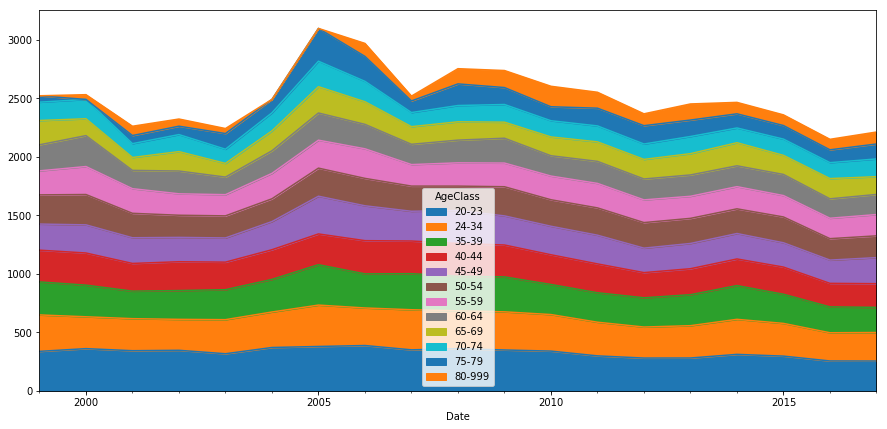

In [57]:
male_group.droplevel(1).unstack().Glossbrenner.plot.area(figsize=(15,7))

In [58]:
female_group = df_grouped.iloc[df_grouped.index.get_level_values('Sex')=='F']
female_group.head()

Age  BodyweightKg    Squat1Kg    Squat2Kg  \
Date Sex AgeClass                                                    
1999 F   20-23     21.851064     63.530638   48.214286   41.309524   
         24-34     28.121951     61.345620   59.345161   46.924333   
         35-39     36.680851     64.125682  101.153846   18.653846   
         40-44     42.232759     67.148276   75.625000   -6.875000   
         45-49     47.818182     57.333333 -140.000000  140.000000   

                     Squat3Kg  Squat4Kg  Best3SquatKg   Bench1Kg   Bench2Kg  \
Date Sex AgeClass                                                             
1999 F   20-23      -7.750000       NaN    118.359211  50.909091  21.477273   
         24-34      -1.250667     185.0    135.153086  54.682895  32.276711   
         35-39     -42.708333       NaN    139.532692  75.441176  48.676471   
         40-44       7.500000    -135.0    132.024857  67.750000  44.500000   
         45-49     152.500000       NaN    125.322000  82.500000  90.000000   

                    Bench3Kg  ...  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  \
Date Sex AgeClass             ...                                          
1999 F   20-23     24.523810  ...   112.750000   125.750000    -2.777778   
         24-34      4.479863  ...   123.042647    84.674394     1.850678   
         35-39      9.968750  ...   110.312500   110.937500    16.833333   
         40-44    -19.250000  ...   157.500000    64.687500    22.187500   
         45-49     93.000000  ...   145.000000   155.000000   165.000000   

                   Deadlift4Kg  Best3DeadliftKg     TotalKg       Wilks  \
Date Sex AgeClass                                                         
1999 F   20-23             NaN       133.123000  298.742381  325.586667   
         24-34            -1.0       146.047979  277.350085  303.022586   
         35-39             NaN       148.332903  264.355909  287.122683   
         40-44             NaN       149.470000  248.254655  260.143621   
         45-49             NaN       141.620909  331.595455  346.500000   

                    McCulloch  Glossbrenner   IPFPoints  
Date Sex AgeClass                                        
1999 F   20-23     328.529048    287.379286  462.005641  
         24-34     303.022586    267.814052  510.568750  
         35-39     287.122683    253.473659  517.665897  
         40-44     265.166897    229.510345  495.812759  
         45-49     377.053333    306.384444  471.963750  

[5 rows x 22 columns]

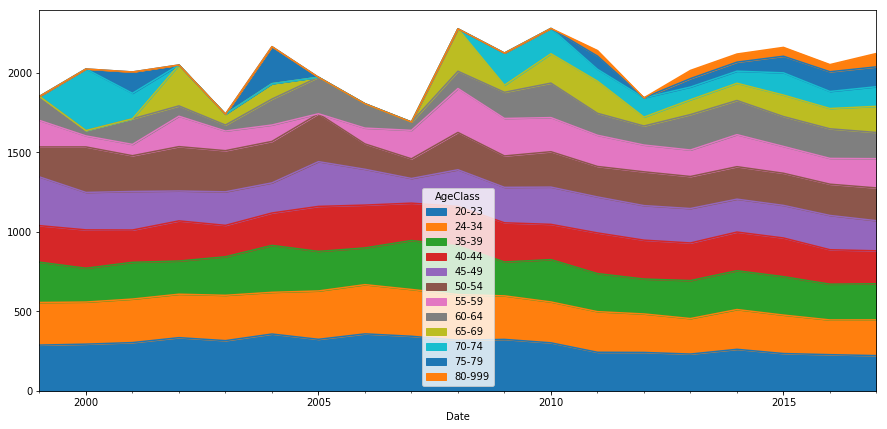

In [59]:
female_group.droplevel(1).unstack().Glossbrenner.plot.area(figsize=(15,7))

You must also answer the following questions in your notebook:

* What's the general trend you see in the area plots?  Your answer can
  be in one or two sentences.





In [ ]:
## TODO


### (50%) perform a clustering analysis using k-means 

The simplicity and power of k-means algorithm makes it one of the best to start with
when performing _unsupervised learning_ &mdash; that is the class labels of your
data are not known _a priori_ and you that will not be training the algorithm
on labeled data.  While this is a powerful and oft useful technique, use it with
care as the initial conditions of the algorithm do not guarantee a global maximum
and as such, running the algorithm with a number of initialization points will
produce better and more reliable results.

Continuing with our OpenPowerlifting data, we're going to do some exploratory data
analysis to examine this dataset in some interesting ways using unsupervised learning,
namely clustering.  The original dataset has over 1 million data points, but in order
to get a good idea of what's in it, we will not need to go back through the entire
dataset, and in fact, we will restrict the focus of our energy on just the last 2 decades
from 1999.

**REMEMBER TO MAKE SURE TO SHOW ALL YOUR WORK IN THE NOTEBOOK SO YOU CAN RECEIVE PARTIAL CREDIT WHERE APPROPRIATE!**

&#167;  You will need to complete part 1 of this homework to filter the data to the necessary
subset for this part.  As we talked about in lecture, the subset of features will just
be the following:

  ```python
  features = [
       'Sex',
       'Age',
       'BodyweightKg',
       'Best3SquatKg',
       'Best3BenchKg',
       'Best3DeadliftKg',
       'TotalKg',
       'Date'
  ]
  ```

Final preparation for clustering will require you to turn all of
_categorical_ variables into _numeric_ one's.  One way to do this
from directly within Pandas is to use `Pandas.get_dummies(your_dataframe)`.
You can also study the
`sklearn.preprocessing.OrdinalEncoder()` which will do something
very similar.  Either way, with the reduced set of features above, the only
categorical variable will be `Sex` as all the others should already
be numerical features.

In your notebook, you should show:

* clearly how many features are now in your dataframe?




In [80]:
features = [
       'Sex',
       'Age',
       'BodyweightKg',
       'Best3SquatKg',
       'Best3BenchKg',
       'Best3DeadliftKg',
       'TotalKg'
  ]

In [81]:
df3 = df2.loc[:,features]

In [82]:
df3.columns.size

7

In [83]:
df3 = pd.get_dummies(df3)

In [84]:
df3.head()

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Sex_F,Sex_M
109,33.0,47.8,120.0,65.0,110.0,295.0,1,0
110,31.0,55.1,135.0,70.0,145.0,350.0,1,0
111,26.0,55.4,125.0,70.0,155.0,350.0,1,0
112,26.0,73.9,105.0,65.0,125.0,295.0,1,0
113,32.0,136.6,200.0,77.5,192.5,470.0,1,0


In [94]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df3).shape

(44319, 8)

&#167;  In class we talked about the fact that the $k$ number of clusters needs to be
determined _a priori_ &mdash; that is you will need to know how many clusters beforehand to
run the algorithm.  To find the optimal $k$, we will use a method called the _silhouette score_.

Adapt the following code to compute the silhouette scores on *only* the dataset filtered by
the features from the prior step.

```python
  from sklearn.cluster import KMeans
  from sklearn.metrics import silhouette_score

  Sum_of_squared_distances = []
  K = range(2, 15)
  for k in K:
      km = KMeans(n_clusters=k, n_init=20)
      km = km.fit(YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS)
      Sum_of_squared_distances.append(km.inertia_)

      silh_score = silhouette_score(YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS, km.labels_)
      print("k = {} | silhouette_score = {}".format(k, silh_score))
```

  The largest score is typically the $k$ you go with.  If $k=2$ is your largest
  score, we will ignore and use the next best score since 2 clusters is not usually an
  interesting number of clusters when dealing with a large set of data points.

  Your notebook must show and answer the following:

  * What is the optimal $k$ according the silhouette score?
  * What else is interesting about the scores?




In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k, n_init=20)
    km = km.fit(df3)
    Sum_of_squared_distances.append(km.inertia_)

    silh_score = silhouette_score(df3, km.labels_)
    print("k = {} | silhouette_score = {}".format(k, silh_score))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

&#167;  Now that you have clusters and optimal cluster, let's find out the characteristics of
the features that dominate them.

Note that the k-means algorithm returns the cluster centers
for each cluster, hence in that center each feature value
is the _representative feature value_ for that cluster.
For example, the `TotalKg` would be the representative `TotalKg` for
that cluster.

Using the optimal cluster size from the silhouette score in the prior
section, please use adapt the following code to determine the cluster
characteristics.

```python
    optimal_k = THE_OPTIMAL_SILH_K

    km = KMeans(n_clusters=optimal_k, n_init=150)
    km = km.fit(YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS)

    for i in range(0, optimal_k):
        l = list(zip(YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS.columns, \
                    km.cluster_centers_[i]))
        l.sort(key=lambda x: x[1], reverse=True)

        print('CLUSTER : {}\n'.format(i))
        for attr, val in l[:]:
          print('\t{} : {}\n'.format(attr, val))
```

Your notebook must show and answer the following:

* for each cluster, describe in real words what the cluster centers are telling
  you about the representative of that cluster.  For example, your answer might
  look like: "for cluster 1, the representative for that cluster is a 24.7 year
  old female, with an average `Best3SquatKg` of 121 and a `TotalKg` of 721",
* show the output of the cluster centers above.

**NOTE**: The order of the features in `km.cluster_centers_` are the same order
as they exist in the DataFrame.





In [ ]:
## TODO